# ITNPBD2 Representing and Manipulating Data
## Visualisation Practical Lab

## USA Zipcode Data Aggregation and Plotting

There is a file of USA geographic location data called zips.json available on Canvas. It is in JSON format and each entry describes a zip code area with its code, city name, location as an array of [longitude, latitude], population and state abbreviation. The first one is Ketchikan, AK:

`{'_id': '99950', 'city': 'KETCHIKAN', 'locn': [-133.18479, 55.942471], 'pop': 422, 'state': 'AK'}`

and there are 29,353 of them in total.

# Read the zip code file into an array of JSON objects
 - The file is in JSON format
 - Download it from Canvas and store it in your H: drive (not on the lab C: drive)
 - Read it into an array of JSON objects
 - Check you have read it correctly by printing the first entry in your array and the length of the array.

In [1]:
import pandas as pd

df = pd.read_json('zips.json', lines=True)

result = df.head(10)
print(result)

count = len(df.index)
display(count)

    _id          city                      loc    pop state
0  1001        AGAWAM  [-72.622739, 42.070206]  15338    MA
1  1002       CUSHMAN   [-72.51565, 42.377017]  36963    MA
2  1005         BARRE  [-72.108354, 42.409698]   4546    MA
3  1007   BELCHERTOWN  [-72.410953, 42.275103]  10579    MA
4  1008     BLANDFORD  [-72.936114, 42.182949]   1240    MA
5  1010     BRIMFIELD  [-72.188455, 42.116543]   3706    MA
6  1011       CHESTER  [-72.988761, 42.279421]   1688    MA
7  1012  CHESTERFIELD   [-72.833309, 42.38167]    177    MA
8  1013      CHICOPEE  [-72.607962, 42.162046]  23396    MA
9  1020      CHICOPEE  [-72.576142, 42.176443]  31495    MA


29353

# Extract just the state and population data

## Create a dictionary with the state name as the key and the population as the value

- For example, one entry in the dictionary might be `'MA':6016425`
- Print the first 10 entries
- What is the total population of Texas (TX)?

In [2]:
df_states = df[['state', 'pop']]
dict = df_states.groupby('state')['pop'].apply(list).to_dict()
print(df_states.head(10))
# display(groups)
print(sum(dict['TX']))

  state    pop
0    MA  15338
1    MA  36963
2    MA   4546
3    MA  10579
4    MA   1240
5    MA   3706
6    MA   1688
7    MA    177
8    MA  23396
9    MA  31495
16984601


# Plot a bar chart of the state codes and their total populations
## Use Matplotlib
- Wrap the graph in a figure so you can make it wider

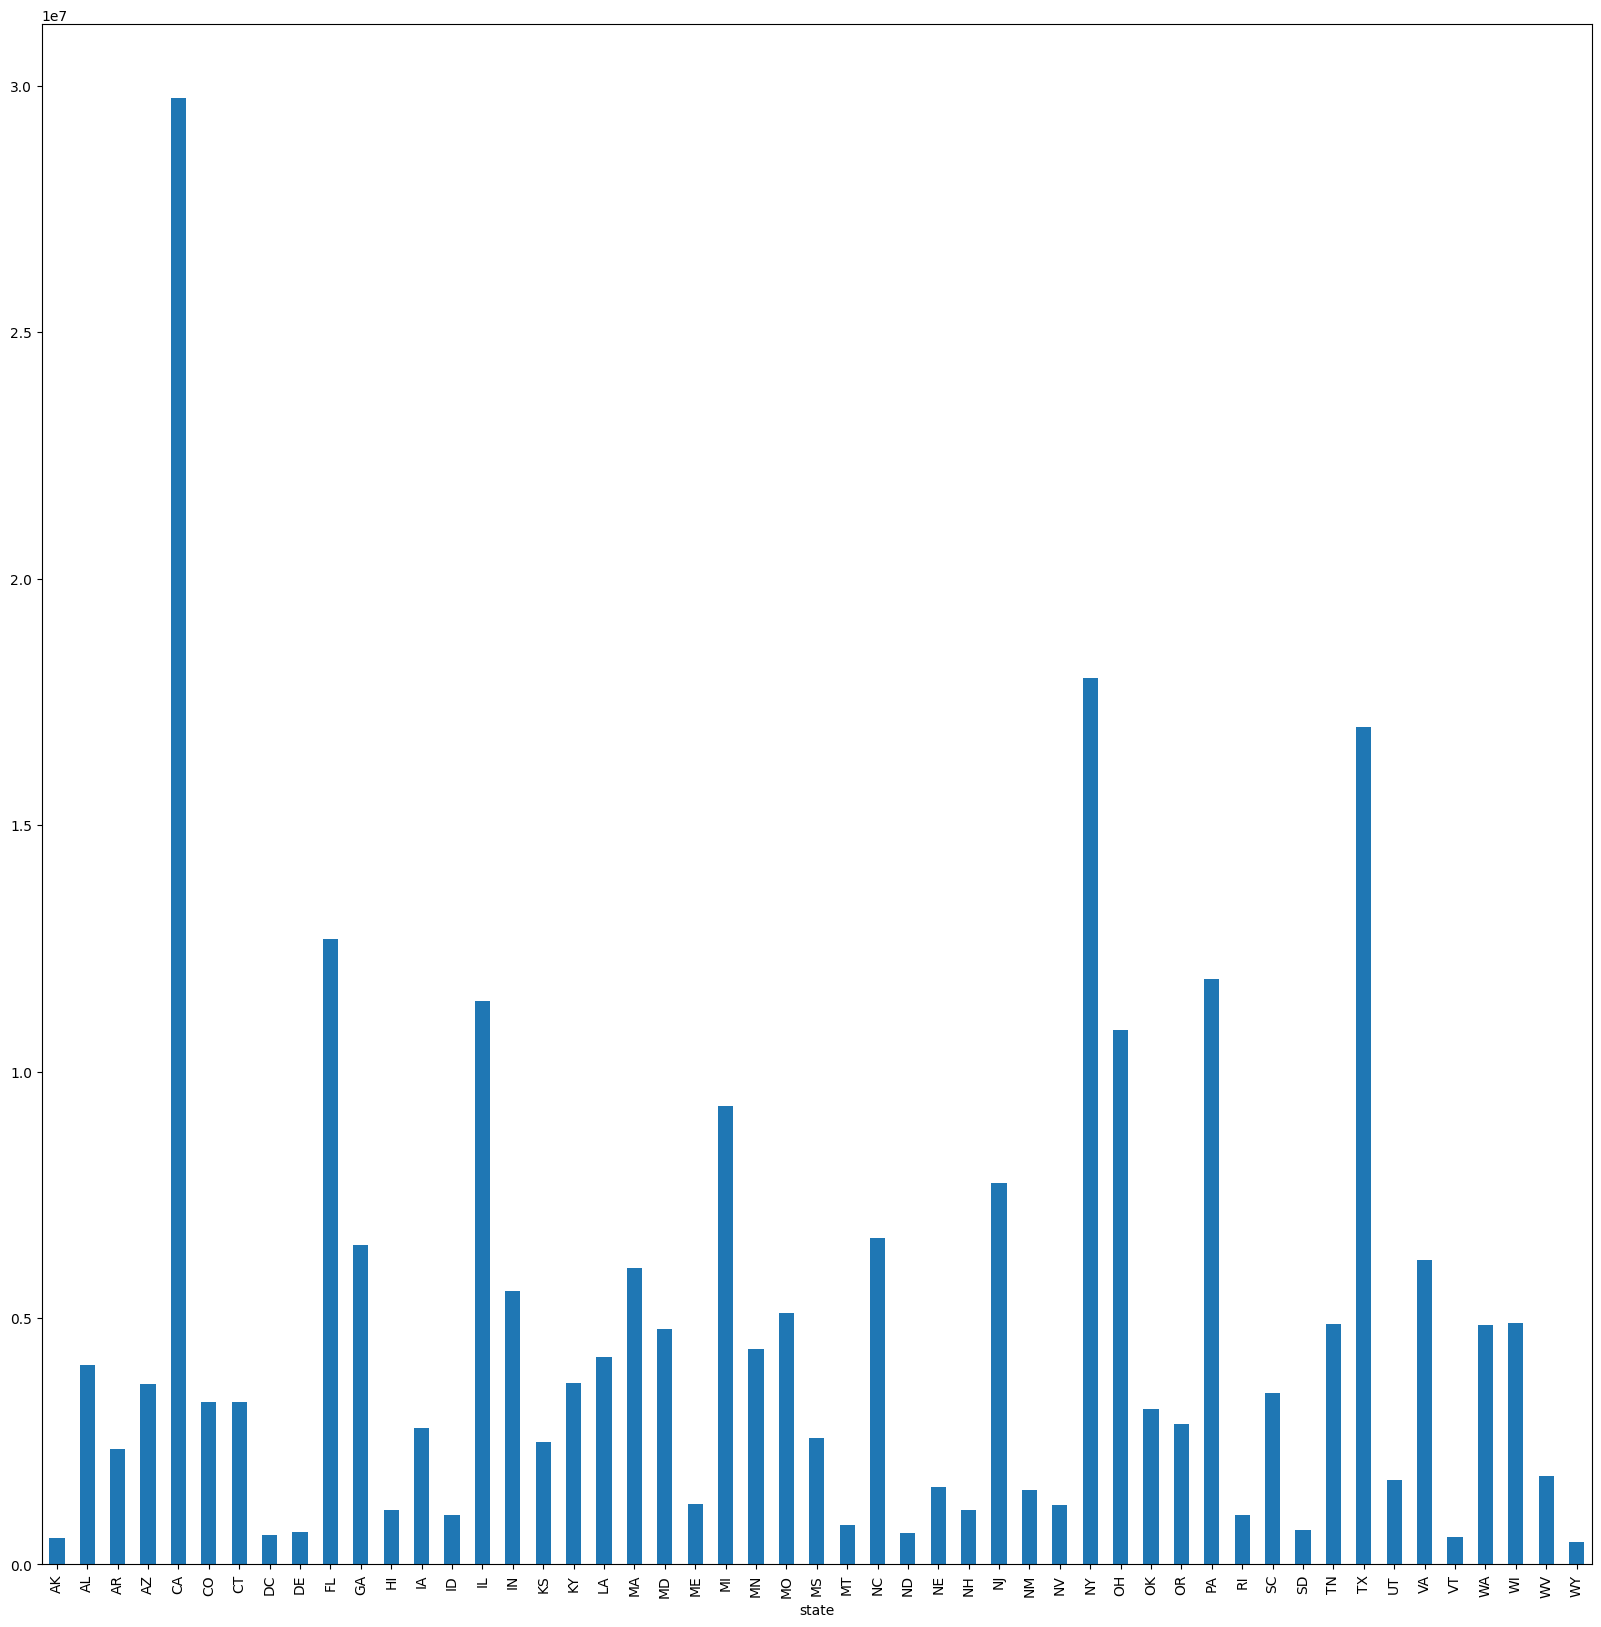

In [3]:
import matplotlib.pyplot as plt

total_pop = df.groupby('state')['pop'].sum()
# print(total_pop)
fig = plt.figure(figsize = (20, 20))
total_pop.plot(kind='bar')
plt.show()

## Load all the data into a Pandas data frame
- Use the Pandas `from_dict` method to create the data frame
- Look at the first few rows with `head`

In [4]:
df_pop = pd.DataFrame.from_dict(dict, 'index').stack().reset_index(level=0)
print(df_pop.head(10))

  level_0        0
0      AK  14436.0
1      AK  15891.0
2      AK  12534.0
3      AK  32383.0
4      AK   7979.0
5      AK   7907.0
6      AK  20128.0
7      AK  29857.0
8      AK  17094.0
9      AK  18356.0


## Notice that the location column is an array. Fix that by splitting it into two columns, `long` and `lat`.
- Clue: use the Pandas `tolist()` method to expand the list into two columns
- You can use `concat` with `axis=1` to join columns

In [5]:
df_new = df.copy()

split = pd.DataFrame(df_new['loc'].tolist(), columns=['long','lat'])
df_new = pd.concat([df_new, split], axis=1)
print(df_new.head(10))

    _id          city                      loc    pop state       long  \
0  1001        AGAWAM  [-72.622739, 42.070206]  15338    MA -72.622739   
1  1002       CUSHMAN   [-72.51565, 42.377017]  36963    MA -72.515650   
2  1005         BARRE  [-72.108354, 42.409698]   4546    MA -72.108354   
3  1007   BELCHERTOWN  [-72.410953, 42.275103]  10579    MA -72.410953   
4  1008     BLANDFORD  [-72.936114, 42.182949]   1240    MA -72.936114   
5  1010     BRIMFIELD  [-72.188455, 42.116543]   3706    MA -72.188455   
6  1011       CHESTER  [-72.988761, 42.279421]   1688    MA -72.988761   
7  1012  CHESTERFIELD   [-72.833309, 42.38167]    177    MA -72.833309   
8  1013      CHICOPEE  [-72.607962, 42.162046]  23396    MA -72.607962   
9  1020      CHICOPEE  [-72.576142, 42.176443]  31495    MA -72.576142   

         lat  
0  42.070206  
1  42.377017  
2  42.409698  
3  42.275103  
4  42.182949  
5  42.116543  
6  42.279421  
7  42.381670  
8  42.162046  
9  42.176443  


# Now use Seaborn to draw a scatter plot where x is the longitude, y is the latitude and point size is population

## You should see a point for each city on a scatter that looks like a map of th USA

<AxesSubplot:xlabel='long', ylabel='lat'>

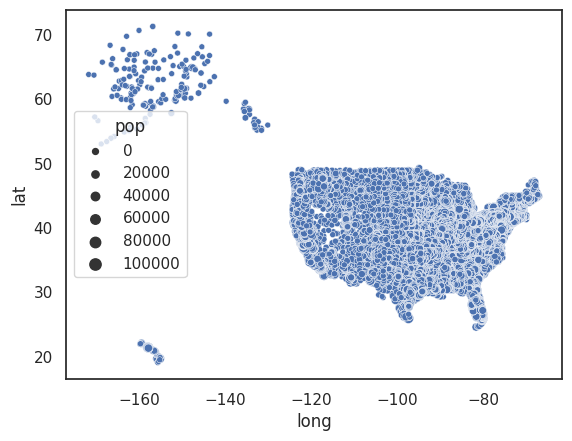

In [9]:
import seaborn as sns

df_loc = df_new.copy()

sns.set_theme(style='white')
sns.scatterplot(
    x='long',
    y='lat',
    size='pop',
    data=df_loc
)


# Still got time?
- Look online for other data about US states and create more plots from that https://www.infoplease.com/ is useful
- Or do something similar for your own country

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=41af8bd7-a5ed-4334-a2fe-992dcc7ea742' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>